
<br><br>

### Considere o dataset abaixo:

In [1]:
import pandas as pd
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


In [2]:
df.isnull().sum()

ind_pop_cid    0
perc_pol       0
taxa_crim      0
nivel_ed       0
crimes         0
dtype: int64

In [3]:
import matplotlib.pyplot as plt

Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>


# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)

In [4]:
import numpy as np

In [5]:
def divide_dataset(dados, perc_teste):
    
    indices_embaralhados = np.random.choice(dados.index,dados.shape[0])  # cria um array de índices embaralhados  
    corte = int(perc_teste * dados.shape[0]) #define a linha de corte entre os dois datasets
    ind_teste, ind_treino = np.split(indices_embaralhados,[corte]) # divide a array de índices em duas partes
    treino = dados.iloc[corte:]  # gera o dataset de treino
    teste = dados.iloc[:corte]    # gera o dataset de teste
    return treino, teste

In [6]:
df_treino, df_teste = divide_dataset (df,0.2)

In [7]:
print ('Dimensões dataset de treino = ',df_treino.shape)
print ('Dimensões no dataset de teste = ',df_teste.shape)
print ('Total de linhas nos dois datasets = ', df_treino.shape[0]+df_teste.shape[0])
print ('Dimensões do dataset original = ', df.shape)

Dimensões dataset de treino =  (1968, 5)
Dimensões no dataset de teste =  (492, 5)
Total de linhas nos dois datasets =  2460
Dimensões do dataset original =  (2460, 5)


## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 


In [8]:
df.corr()[['crimes']]

,crimes
ind_pop_cid,0.067237
perc_pol,-0.377929
taxa_crim,0.578659
nivel_ed,-0.200762
crimes,1.000000


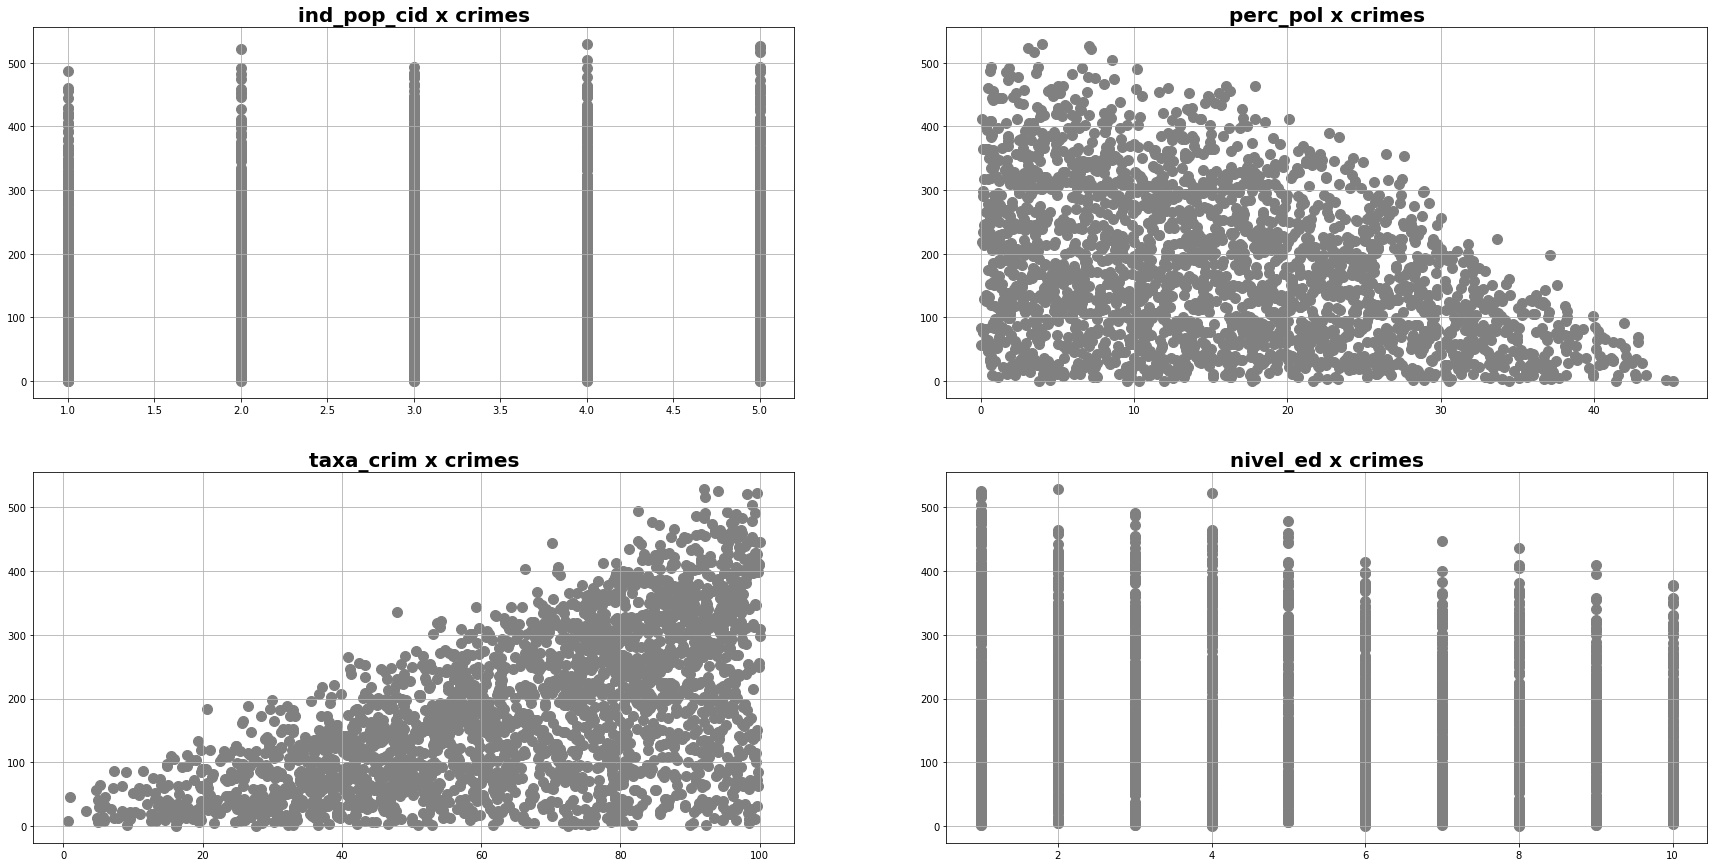

In [9]:
plt.figure(figsize=[30,15])

for i in range(1, 5):
    
    plt.subplot(2,2,i)
    plt.title(df.columns[i-1] + ' x ' + 'crimes', fontsize = 20, fontweight = 'bold')
    plt.scatter(df.iloc[:,(i-1)],df.crimes,s=100,c='gray')
    
    plt.grid()

plt.show()

**Adotaremos como variável única "taxa_crim" pois é a variável que apresentou correlação mais forte com a variável alvo "crimes"**

<br>

In [10]:
# segmentar novamente o dataset treino, para criar um dataset de validação

corte_valida = int(df_treino.shape[0] * 0.2)
df_valida = df_treino.iloc[:corte_valida]
df_treino1 = df_treino.iloc[corte_valida:]

In [11]:
#definição das funções de cálculo dos erros médios quadráticos

def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
# função para plotagem das curvas de regressão comparativas entre dois datasets

def plota_curva_regressao (X0, y0, X1, y1, modelo, nome_modelo):
    
    modelo.fit(X0,y0)
    
    pred_ds0 = modelo.predict(X0)
    pred_ds1 = modelo.predict(X1)
    
    rmse_ds0 = RMSE (y0, pred_ds0)
    rmse_ds1 = RMSE (y1, pred_ds1)
    
    plt.figure(figsize = [20,6])
    
    plt.subplot(1,2,1)
    plt.title('Modelo: ' + nome_modelo + '   ####    RMSE Dataset Treino:' + str(round(rmse_ds0,2)),fontsize =14)
    plt.scatter(X0,y0, c = 'gray', s=100)
    plt.plot(X0,pred_ds0, c = 'blue', lw = 2)
    plt.grid()
    
    plt.subplot(1,2,2)    
    plt.title('Modelo: ' + nome_modelo + '   ####    RMSE Dataset Validação ou Teste:' + str(round(rmse_ds1,2)),fontsize =14)
    plt.scatter(X1,y1,c = 'gray', s=100)
    plt.plot(X1,pred_ds1, c = 'blue', lw = 2)
    plt.grid()
    
    plt.show()    

In [15]:
# definição dos datasets de treino e validação, considerando somente a variável 'taxa_crim'

X = df_treino1.taxa_crim.values.reshape(-1,1)
y = df_treino1.crimes.values

Xvalida = df_valida.taxa_crim.values.reshape(-1,1)
yvalida = df_valida.crimes.values

Xteste = df_teste.taxa_crim.values.reshape(-1,1)
yteste = df_teste.crimes.values

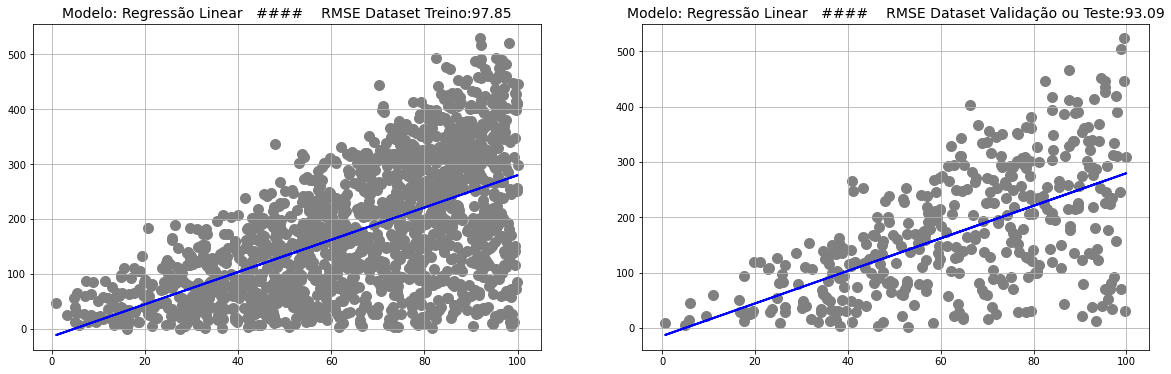

In [16]:
# comparação entre treino e validação (regressão linear)
lm=LinearRegression()
plota_curva_regressao (X, y, Xvalida, yvalida, lm, 'Regressão Linear')

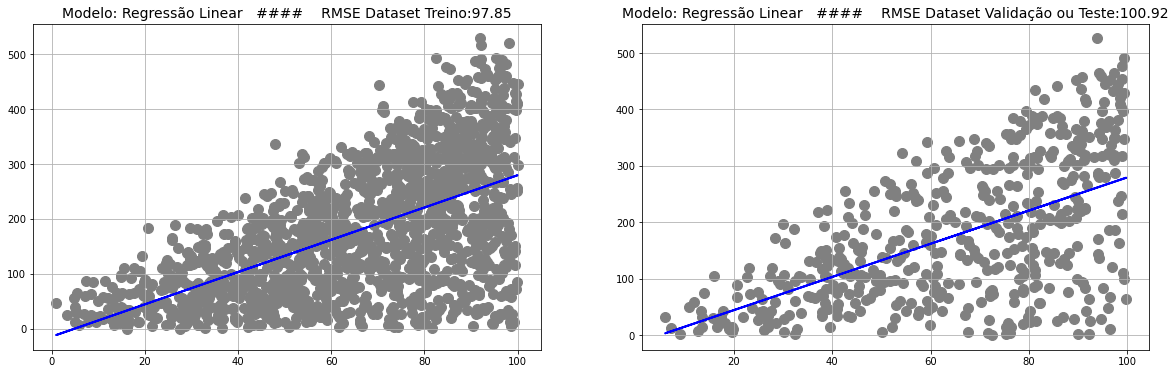

In [17]:
# comparação entre treino e teste
lm=LinearRegression()
plota_curva_regressao (X, y, Xteste, yteste, lm, 'Regressão Linear')

**o modelo de regressão linear retornou um erros de 97.85 e 93.09 no treino e na validação respectivamente**

<br>

In [18]:
# define função que iterar sobre uma range de do tamanho do dataset específico para visualizar a variação dos erros em dois
# datasets considerando o algoritmo knn e conforme o valor de k

def plota_curvas_RMSE(X, y, Xvalida, yvalida, inicio, fim, passo):
    
    vizinhos, erros_treino, erros_valida = [],[],[]

    for i in np.arange(inicio, fim, passo):
        modelo = KNeighborsRegressor(n_neighbors = i)
        modelo.fit (X, y)
        pred_treino = modelo.predict(X)
        pred_valida = modelo.predict(Xvalida)

        rmse_treino = RMSE (y, pred_treino)
        rmse_valida = RMSE (yvalida, pred_valida)
        vizinhos.append(i)
        erros_treino.append(rmse_treino)
        erros_valida.append(rmse_valida)

    plt.figure(figsize=[20,8])
    plt.plot(vizinhos,erros_treino,label='RMSE Treino')
    plt.plot(vizinhos,erros_valida, label = 'RMSE Validação')
    plt.grid()
    plt.legend()
    plt.show()

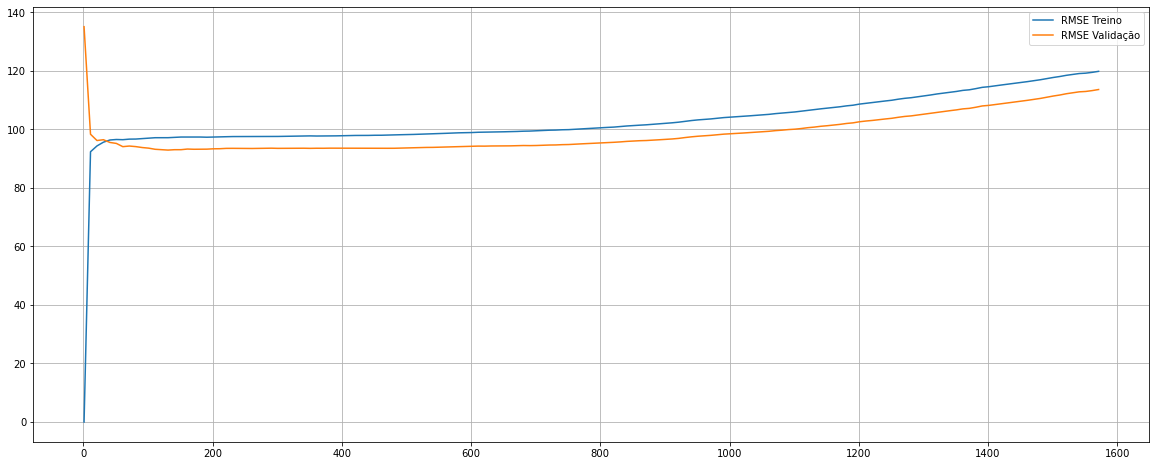

In [19]:
# simulação dos erros em vários modelos com K variando desde 1 até o tamanho do dataset de treino

plota_curvas_RMSE(X,y,Xvalida,yvalida,1,len(X),10)

Os modelos com número de vizinhos mais baixos (até próximo de 30) parecem desbalanceados no sentido de que temos diferenças de erros muito grandes entre as predições dos datasets de teste e validação. Ou seja, são modelos que sofrem outfitting.

O erro médio registrado no dataset de validação cai até próximo de K=100 e o do treino fica estabilizado. Sofrem de underfitting nestas situações. A partir do valor K=400 (tamanho aproximado do dataset de validação) os erros começama ficar mais altos e divergentes.

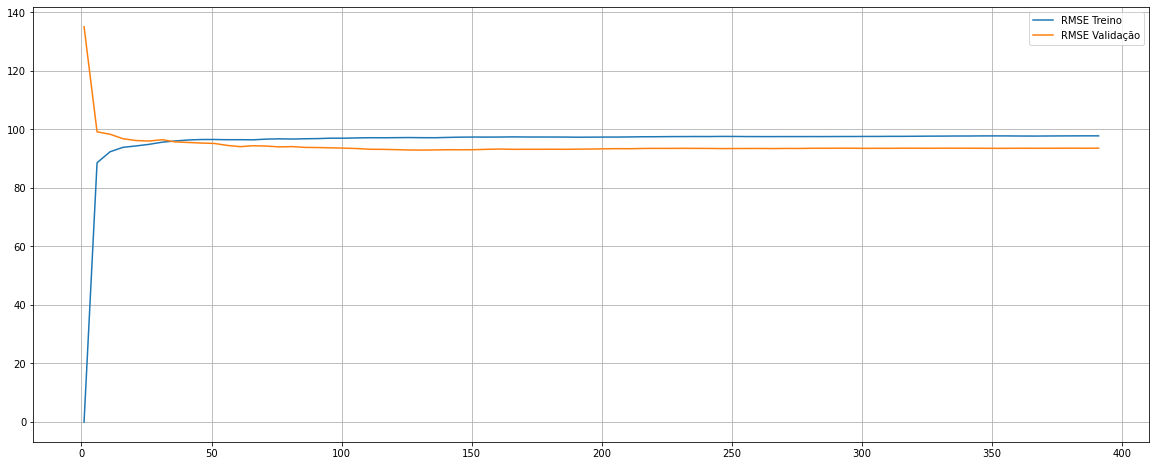

In [20]:
# consideraremos agora somente a extensão do dataset de validação

plota_curvas_RMSE(X,y,Xvalida,yvalida,1,len(Xvalida),5)

Vamos supor que o melhor valor para o modelo seja aquele em que tenhamos o menor valor de K com divergência mínima entre os erros observados no treino e validação.

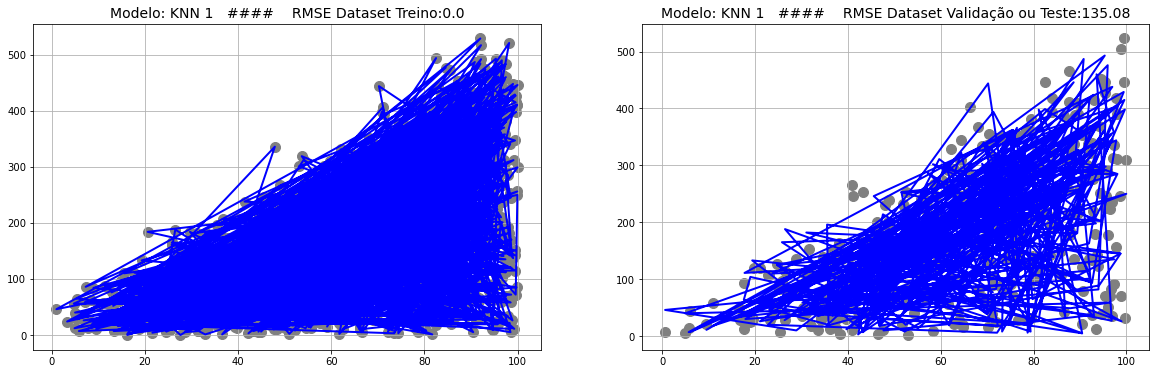

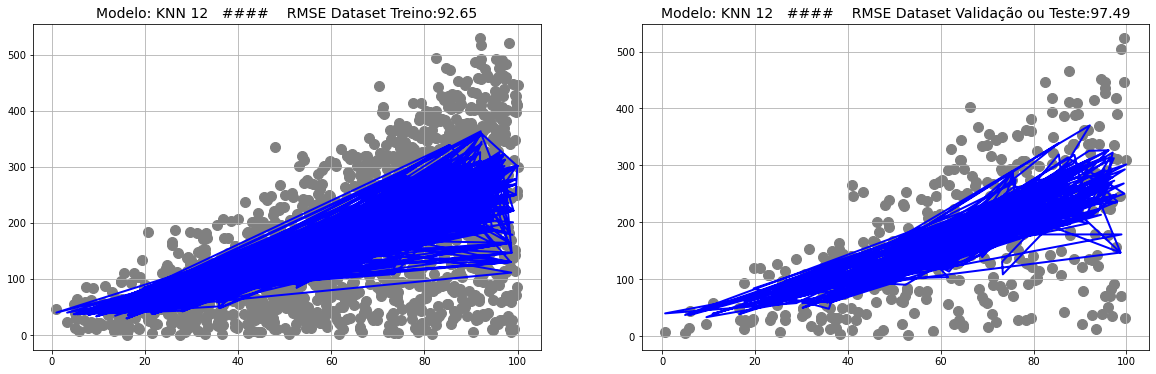

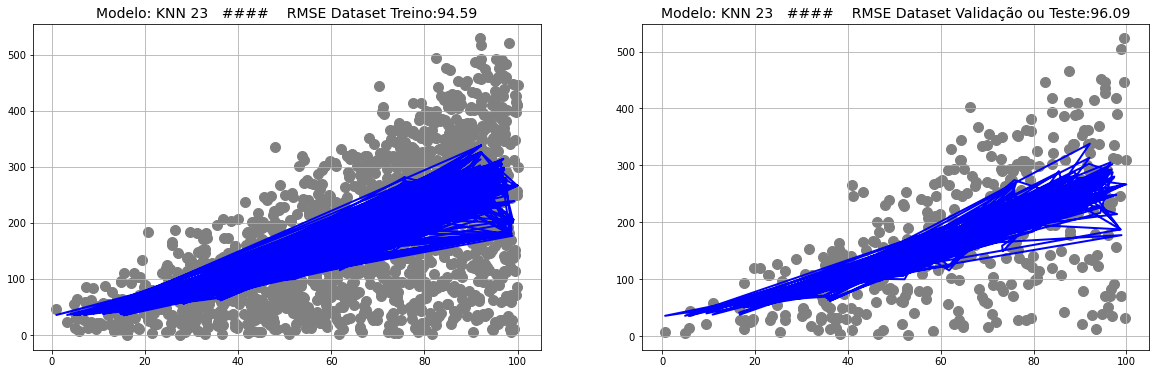

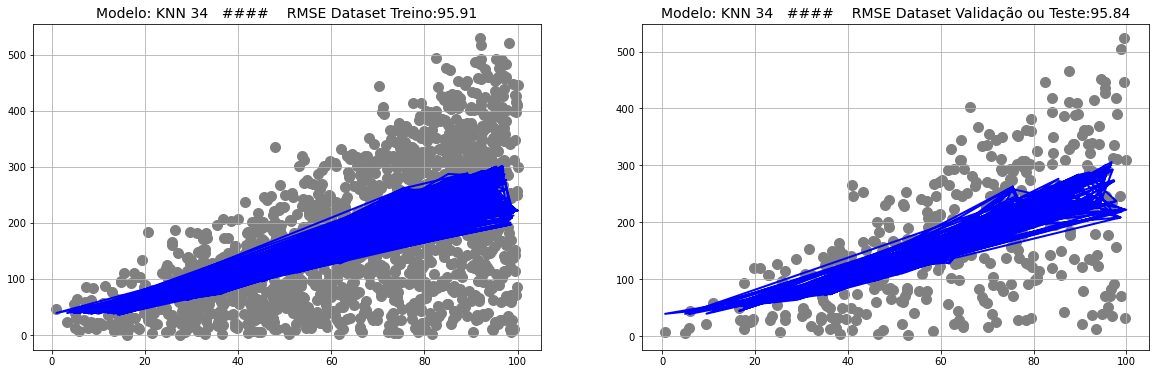

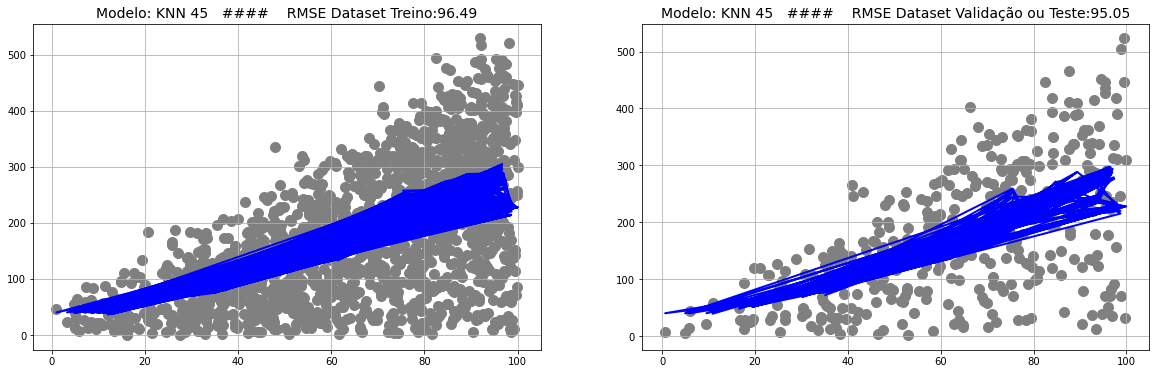

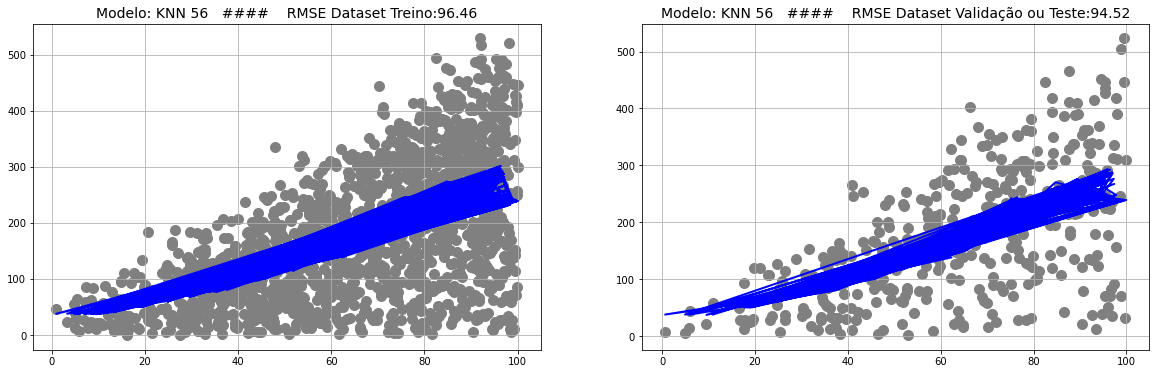

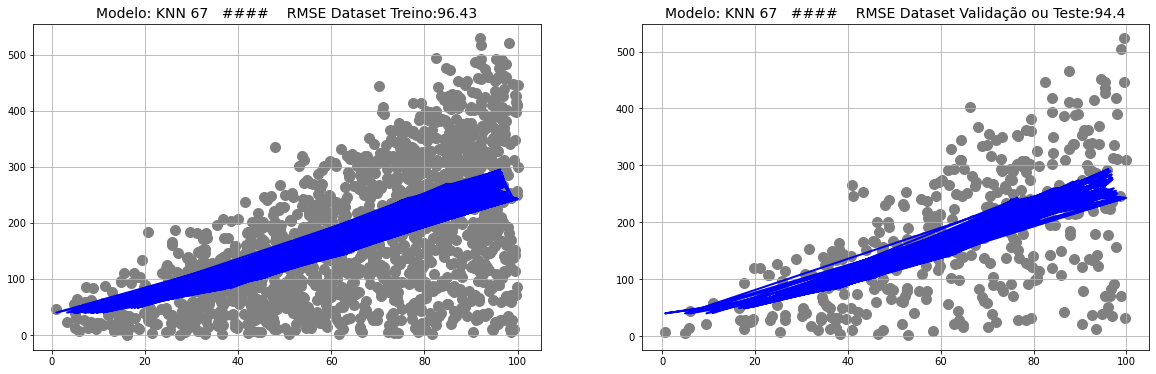

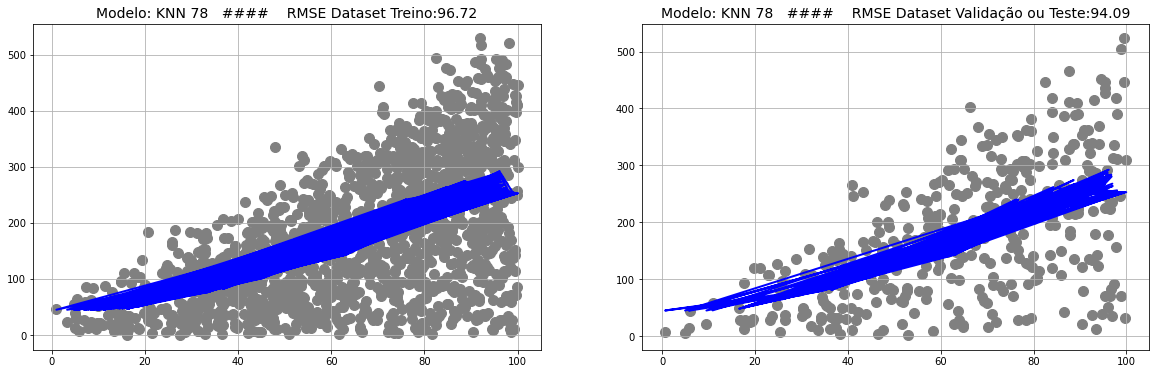

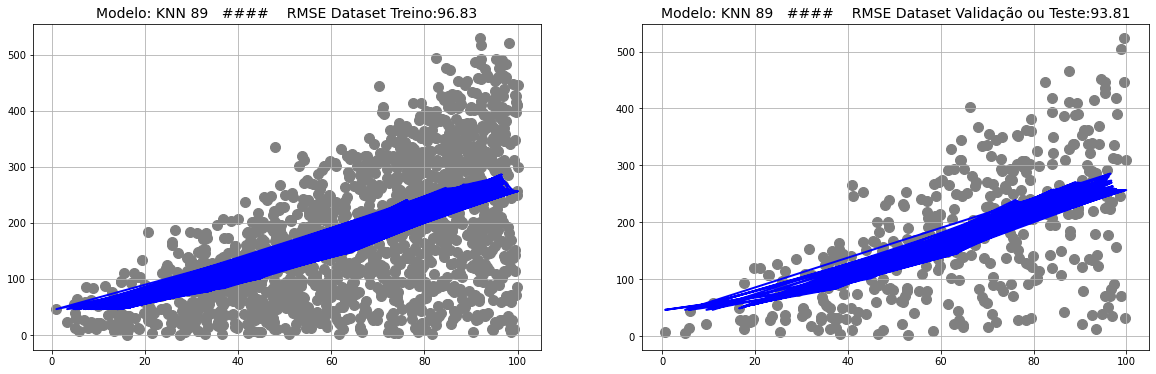

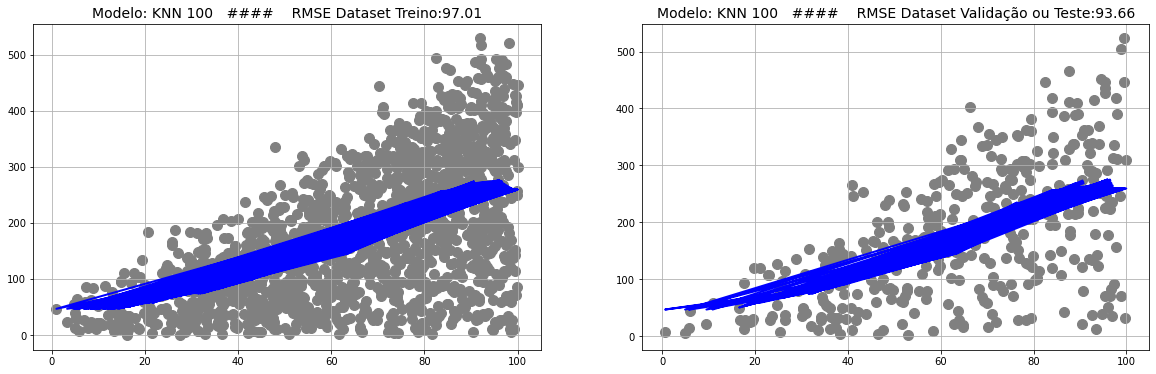

In [21]:
for i in np.linspace(1,100,10):
    vizinhos = int(i)
    modelo = KNeighborsRegressor(n_neighbors = vizinhos)
    plota_curva_regressao (X, y, Xvalida, yvalida, modelo, 'KNN '+str(vizinhos))

**Adotaremos K=30 como modelo a ser aplicado no dataset de teste**

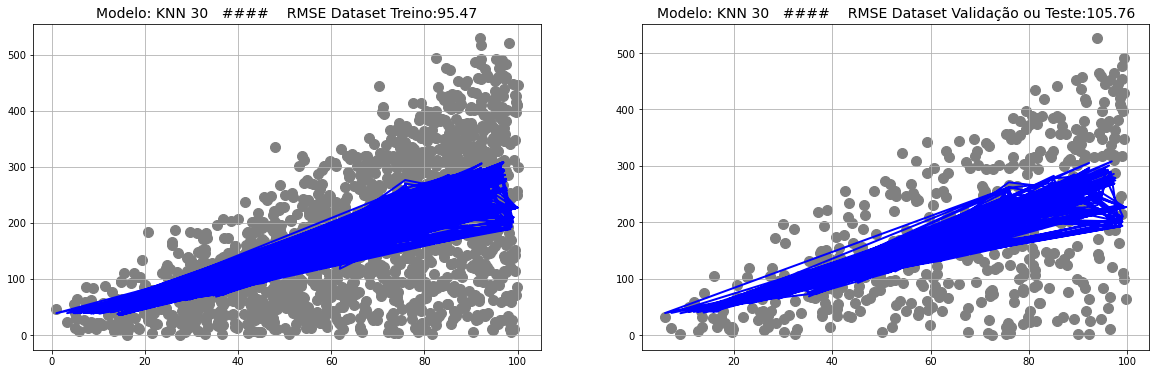

In [22]:
modelo = KNeighborsRegressor(n_neighbors = 30)
plota_curva_regressao(X,y,Xteste,yteste,modelo, 'KNN '+str(30))

Com 30 vizinhos, o erro no dataset de treino é de 95,47 e no de teste 105,76.
Em comparação com o modelo de regressão linear, podemos dizer que os valores ficaram menos estáveis do que naquele modelo.



### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.

In [23]:
# redefinição dos datasets de treino, validação e teste incorporando todas as variáveis disponíveis

X = df_treino1.iloc[:,:4].values
Xvalida = df_valida.iloc[:,:4].values
Xteste = df_teste.iloc[:,:4].values

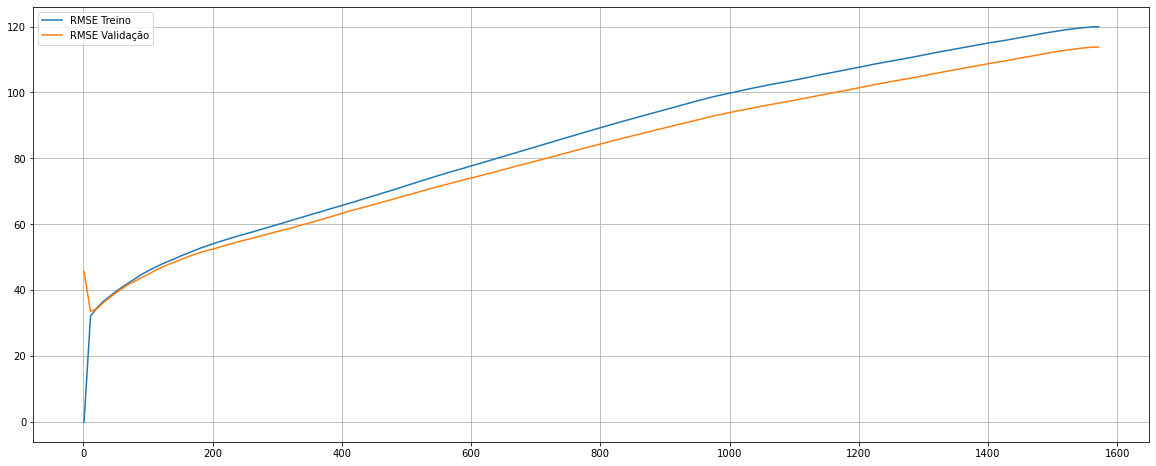

In [24]:
# plotagem das curvas de RMSE treino x validação no modelo considerando todas as variáveis

plota_curvas_RMSE(X,y,Xvalida,yvalida,1,len(X),10)

Aqui observamos uma aproximação dos RMSE´s em um valor de K próximo de 25, a partir do qual ambos os erros passama aumentar e se distanciarem.

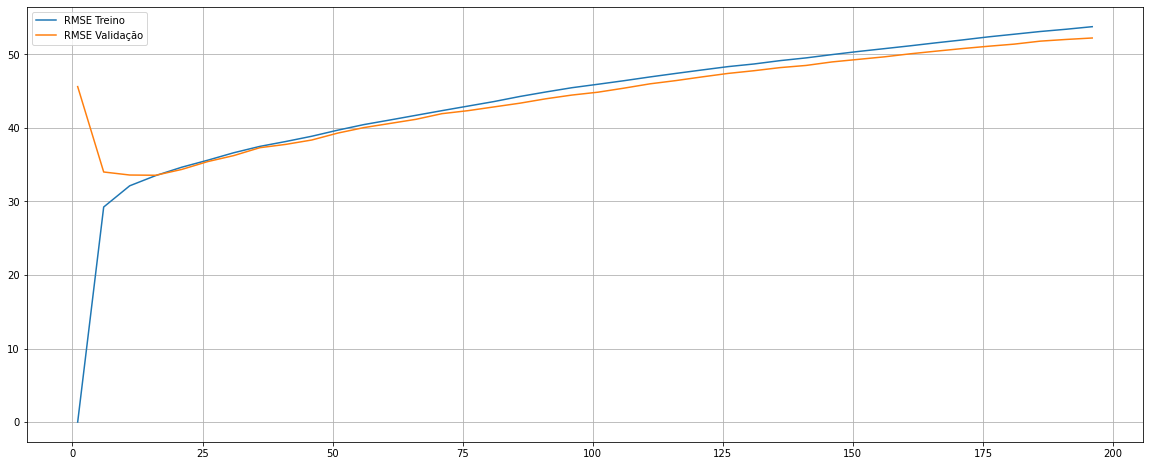

In [25]:
# verificação da curva até K=200

plota_curvas_RMSE(X,y,Xvalida,yvalida,1,200,5)

Valores de K num intervalo entre 15 e 35 as diferenças entre os erros são estáveis. Abaixo disto apresentam outfitting e acima disto underfitting, cada vez mais intenso quanto maior o K.

In [26]:
# vamos verificar em detalhe os erros em alguns modelos neste intervalo

for i in np.linspace(10,40,10):
    vizinhos = int(i)
    modelo = KNeighborsRegressor(n_neighbors = vizinhos)
    modelo.fit(X,y)    
    pred_treino = modelo.predict(X)
    pred_valida = modelo.predict(Xvalida)
    
    rmse_treino = round(RMSE (y, pred_treino),2)
    rmse_valida = round(RMSE (yvalida, pred_valida),2)
    
    print ('Modelo: K ',vizinhos,'   ### RMSE Treino: ',rmse_treino,'   ### RMSE Validação: ',rmse_valida)
    

Modelo: K  10    ### RMSE Treino:  31.78    ### RMSE Validação:  33.72
Modelo: K  13    ### RMSE Treino:  32.69    ### RMSE Validação:  33.8
Modelo: K  16    ### RMSE Treino:  33.52    ### RMSE Validação:  33.57
Modelo: K  20    ### RMSE Treino:  34.43    ### RMSE Validação:  34.34
Modelo: K  23    ### RMSE Treino:  35.15    ### RMSE Validação:  34.68
Modelo: K  26    ### RMSE Treino:  35.61    ### RMSE Validação:  35.43
Modelo: K  30    ### RMSE Treino:  36.41    ### RMSE Validação:  36.02
Modelo: K  33    ### RMSE Treino:  37.03    ### RMSE Validação:  36.71
Modelo: K  36    ### RMSE Treino:  37.49    ### RMSE Validação:  37.32
Modelo: K  40    ### RMSE Treino:  37.96    ### RMSE Validação:  37.71


Adotaremos o modelo com K=30 para teste

In [27]:
modelo = KNeighborsRegressor(n_neighbors = 30)
modelo.fit(X,y)    
pred_treino = modelo.predict(X)
pred_teste = modelo.predict(Xteste)
   
rmse_treino = round(RMSE (y, pred_treino),2)
rmse_teste = round(RMSE (yteste, pred_teste),2)
   
print ('Modelo: K ',30,'   ### RMSE Treino: ',rmse_treino,'   ### RMSE Teste: ',rmse_teste)

Modelo: K  30    ### RMSE Treino:  36.41    ### RMSE Teste:  38.68


Os erros médios entre datasets de treino, validação e teste ficaram bastante estáveis (36,41 / 36,02 / 38,68). Os erros médios no modelo com mais variáveis ficaram menores em todos os datasets, e menores do que na regressão linear. Quando incorporamos todas as variáveis parece que o temos mais precisão.